<a href="https://colab.research.google.com/github/Sujoy-004/Chat-Analyzer-Pro/blob/main/notebooks/06_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cell 1: Conversation Summarizer

In [43]:
print("Installing required packages for Day 11...")

!pip install transformers torch pandas numpy matplotlib seaborn -q

print("\n✅ All dependencies installed successfully!")
print("📦 Key packages: transformers (T5-small), torch, pandas")

Installing required packages for Day 11...

✅ All dependencies installed successfully!
📦 Key packages: transformers (T5-small), torch, pandas


## Cell 02: Import Libraries and Setup

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import json
from collections import Counter
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
# Fetch the summarizer module from GitHub
import urllib.request
import sys

In [45]:
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [46]:
# GitHub raw URL for summarizer.py
github_url = "https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/src/analysis/summarizer.py"

try:
    with urllib.request.urlopen(github_url) as response:
        summarizer_code = response.read().decode('utf-8')

    # Execute the code to make classes available
    exec(summarizer_code, globals())

    print("✅ summarizer.py fetched and loaded from GitHub!")
    print(f"📍 Source: {github_url}")
    print("\n✅ ConversationSummarizer class is now available!")

except Exception as e:
    print(f"❌ Error fetching summarizer.py: {e}")
    print("Please ensure the file exists at the GitHub URL")

✅ summarizer.py fetched and loaded from GitHub!
📍 Source: https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/src/analysis/summarizer.py

✅ ConversationSummarizer class is now available!


## Cell 03: Load Parsers and Sample Data from GitHub

In [47]:
# Fetch WhatsApp parser
print("📥 Fetching whatsapp_parser.py...")
whatsapp_parser_url = "https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/src/parser/whatsapp_parser.py"

try:
    with urllib.request.urlopen(whatsapp_parser_url) as response:
        whatsapp_parser_code = response.read().decode('utf-8')
    exec(whatsapp_parser_code, globals())
    print("✅ WhatsApp parser loaded!")
except Exception as e:
    print(f"⚠️ WhatsApp parser error: {e}")

📥 Fetching whatsapp_parser.py...
Sample file not found: data/sample_chats/whatsapp_sample.txt
Please place your WhatsApp export file in the data/sample_chats/ directory
✅ WhatsApp parser loaded!


In [48]:
# Fetch Telegram parser
print("📥 Fetching telegram_parser.py...")
telegram_parser_url = "https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/src/parser/telegram_parser.py"

try:
    with urllib.request.urlopen(telegram_parser_url) as response:
        telegram_parser_code = response.read().decode('utf-8')
    exec(telegram_parser_code, globals())
    print("✅ Telegram parser loaded!")
except Exception as e:
    print(f"⚠️ Telegram parser error: {e}")

📥 Fetching telegram_parser.py...
✅ Telegram parser loaded!


In [49]:
# Load WhatsApp sample
whatsapp_sample_url = "https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/data/sample_chats/whatsapp_sample.txt"
telegram_sample_url = "https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/data/sample_chats/telegram_sample.json"

In [50]:
try:
    # Parse WhatsApp data
    print("📱 Parsing WhatsApp sample...")
    with urllib.request.urlopen(whatsapp_sample_url) as response:
        whatsapp_text = response.read().decode('utf-8')

    # Save temporarily and parse
    with open('temp_whatsapp.txt', 'w', encoding='utf-8') as f:
        f.write(whatsapp_text)

    whatsapp_df = parse_whatsapp_chat('temp_whatsapp.txt')
    print(f"✅ WhatsApp data loaded: {len(whatsapp_df)} messages")

except Exception as e:
    print(f"⚠️ WhatsApp loading error: {e}")
    whatsapp_df = pd.DataFrame()

📱 Parsing WhatsApp sample...

=== WhatsApp Chat Analysis Summary ===
total_messages: 27
date_range: {'start': '2023-12-25', 'end': '2023-12-27'}
participants: 2
participant_list: ['Alice', 'Bob']
messages_per_participant: {'Alice': 14, 'Bob': 13}
media_messages: 2
total_words: 182
avg_message_length: 37.81481481481482
total_emojis: 9
✅ WhatsApp data loaded: 27 messages


In [51]:
try:
    # Parse Telegram data
    print("💬 Parsing Telegram sample...")
    with urllib.request.urlopen(telegram_sample_url) as response:
        telegram_json = json.loads(response.read().decode('utf-8'))

    # Save temporarily and parse
    with open('temp_telegram.json', 'w', encoding='utf-8') as f:
        json.dump(telegram_json, f)

    telegram_df = parse_telegram_json('temp_telegram.json')
    print(f"✅ Telegram data loaded: {len(telegram_df)} messages")

except Exception as e:
    print(f"⚠️ Telegram loading error: {e}")
    telegram_df = pd.DataFrame()

💬 Parsing Telegram sample...
⚠️ Telegram loading error: name 'parse_telegram_json' is not defined


In [52]:
# Choose the larger dataset for main testing
if len(whatsapp_df) >= len(telegram_df):
    df = whatsapp_df.copy()
    data_source = "WhatsApp"
else:
    df = telegram_df.copy()
    data_source = "Telegram"

print(f"📍 Using {data_source} data for testing")
print(f"📊 Total messages: {len(df)}")
print(f"👥 Participants: {df['sender'].unique().tolist()}")

📍 Using WhatsApp data for testing
📊 Total messages: 27
👥 Participants: ['Alice', 'Bob']


In [53]:
if 'date' in df.columns:
    print(f"📅 Date range: {df['date'].min()} to {df['date'].max()}")

print(df[['sender', 'message']].head(5).to_string())
print("✅ Data loaded and ready for summarization!")

📅 Date range: 2023-12-25 to 2023-12-27
  sender                                                                     message
0  Alice                                                         Merry Christmas! 🎄🎅
1    Bob                  Merry Christmas to you too! Hope you're having a great day
2  Alice  Thanks! Opening presents with family right now\nFamily time is the best ❤️
3    Bob                That sounds wonderful! I'm cooking dinner for everyone today
4  Alice                                                             <Media omitted>
✅ Data loaded and ready for summarization!


## Cell 04: Initialize Conversation Summarizer

In [54]:
# Initialize the ConversationSummarizer
summarizer = ConversationSummarizer(
    model_name="t5-small",
    max_length=150,
    min_length=40
)

Loading t5-small model...


Device set to use cpu


✅ t5-small loaded successfully!


In [55]:
print(f"🔧 Model: {summarizer.model_name}")
print(f"📏 Max length: {summarizer.max_length} tokens")
print(f"📏 Min length: {summarizer.min_length} tokens")

🔧 Model: t5-small
📏 Max length: 150 tokens
📏 Min length: 40 tokens


## Cell 05: Generate Overall Conversation Summary

In [56]:
# Generate summary of entire conversation
overall_summary = summarizer.summarize_conversation(df, max_messages=100)
print(f"📝 Summary:")
print(f"   {overall_summary['summary']}")
print()
print(f"📈 Statistics:")
print(f"   • Total messages in dataset: {overall_summary['total_messages']}")
print(f"   • Messages used for summary: {overall_summary['messages_summarized']}")
print(f"   • Model used: {overall_summary['model_used']}")
print("="*60)

# Store for later use
summary_results = {'overall': overall_summary}

Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


📝 Summary:
   Bob: Looks amazing! You're such a great cook Bob: Thank you! We watched Christmas movies until late . Bob: Great choices! Those never get old Alice: Happy Wednesday .

📈 Statistics:
   • Total messages in dataset: 27
   • Messages used for summary: 27
   • Model used: t5-small


## Cell 06: Summarize by Date Range

In [57]:
# Get date range from data
start_date = df['date'].min()
end_date = df['date'].max()

print(f"📊 Data spans from {start_date} to {end_date}")
print()

📊 Data spans from 2023-12-25 to 2023-12-27



In [58]:
# Summarize first day
first_day = df['date'].min().strftime('%Y-%m-%d')
print(f"🔍 Summarizing conversations on {first_day}...")

date_summary = summarizer.summarize_by_date_range(
    df,
    start_date=first_day,
    end_date=first_day,
    date_column='date'
)

Your max_length is set to 150, but your input_length is only 139. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=69)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


🔍 Summarizing conversations on 2023-12-25...


In [59]:
print(f"📅 DATE RANGE SUMMARY: {first_day}")
print("="*60)
print(f"📝 Summary:")
print(f"   {date_summary['summary']}")
print()
print(f"📈 Statistics:")
print(f"   • Total messages: {date_summary['total_messages']}")
print(f"   • Messages summarized: {date_summary['messages_summarized']}")
print(f"   • Date range: {date_summary['date_range']}")

# Store result
summary_results['date_range'] = date_summary

📅 DATE RANGE SUMMARY: 2023-12-25
📝 Summary:
   Bob: That sounds wonderful! I'm cooking dinner for everyone today Alice: Here's our Christmas tree!  Bob: Looks amazing! You're such a great cook Bob: Thanks for sharing your day .

📈 Statistics:
   • Total messages: 13
   • Messages summarized: 13
   • Date range: 2023-12-25 to 2023-12-25


## Cell 07: Summarize by Participant

In [60]:
# Get all participants
participants = df['sender'].unique()
print(f"📊 Participants found: {participants.tolist()}\n")

📊 Participants found: ['Alice', 'Bob']



In [61]:
participant_summaries = {}

for participant in participants:
    print(f"🔍 Summarizing messages from {participant}...")

    participant_summary = summarizer.summarize_by_participant(
        df,
        participant=participant,
        sender_column='sender'
    )

    participant_summaries[participant] = participant_summary

    print(f"✅ Summary generated for {participant}")
    print(f"   Messages: {participant_summary['total_messages']}")
    print()

Your max_length is set to 150, but your input_length is only 149. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=74)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


🔍 Summarizing messages from Alice...


Your max_length is set to 150, but your input_length is only 139. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=69)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ Summary generated for Alice
   Messages: 14

🔍 Summarizing messages from Bob...
✅ Summary generated for Bob
   Messages: 13



In [62]:
for participant, summary_data in participant_summaries.items():
    print(f"\n📌 {participant.upper()}")
    print(f"   Messages: {summary_data['total_messages']}")
    print(f"   Summary: {summary_data['summary']}")
    print()

# Store results
summary_results['participants'] = participant_summaries


📌 ALICE
   Messages: 14
   Summary: Alice: Looks amazing! You're such a great cook Alice: It definitely will be! We watched Christmas movies until late  Alice: Perfect lazy Christmas evening Alice: Home Alone and Elf - the classics!


📌 BOB
   Messages: 13
   Summary: the holiday magic is over Bob: but it was a great Christmas dinner Bob: You too! Bob: That sounds great Bob: you too! I'm cooking dinner for everyone today Bob: Beautiful tree!



## Cell 08: Generate Periodic Summaries

In [63]:
# Generate daily summaries
periodic_summaries = summarizer.generate_periodic_summaries(
    df,
    period='D',  # 'D' = Daily, 'W' = Weekly, 'M' = Monthly
    date_column='date'
)

print(f"✅ Generated {len(periodic_summaries)} daily summaries!\n")

Your max_length is set to 150, but your input_length is only 139. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=69)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Your max_length is set to 150, but your input_length is only 89. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Y

✅ Generated 3 daily summaries!



In [64]:
for idx, row in periodic_summaries.iterrows():
    print(f"\n📅 Period: {row['period']}")
    print(f"   Date: {row['start_date'].strftime('%Y-%m-%d')}")
    print(f"   Messages: {row['message_count']}")
    print(f"   Summary: {row['summary']}")
    print()


📅 Period: 2023-12-25
   Date: 2023-12-25
   Messages: 13
   Summary: Bob: That sounds wonderful! I'm cooking dinner for everyone today Alice: Here's our Christmas tree!  Bob: Looks amazing! You're such a great cook Bob: Thanks for sharing your day .


📅 Period: 2023-12-26
   Date: 2023-12-26
   Messages: 8
   Summary: Alice: Good morning! How was your evening? Bob: Morning! It was great, played some games with the family Bob: How about you? Alice: Perfect lazy Christmas evening Bob: That sounds perfect!


📅 Period: 2023-12-27
   Date: 2023-12-27
   Messages: 6
   Summary: Bob: I know right! It was a great Christmas Alice: Absolutely! Already looking forward to next year Alice: Hope your day goes well! Bob: You too!  Bob: Thank you for sharing your story .



In [65]:
# Display as DataFrame
print("\n📊 Periodic Summaries DataFrame:")
print(periodic_summaries[['period', 'message_count', 'summary']].to_string(index=False))

# Store results
summary_results['periodic'] = periodic_summaries


📊 Periodic Summaries DataFrame:
    period  message_count                                                                                                                                                                                      summary
2023-12-25             13         Bob: That sounds wonderful! I'm cooking dinner for everyone today Alice: Here's our Christmas tree!  Bob: Looks amazing! You're such a great cook Bob: Thanks for sharing your day .
2023-12-26              8 Alice: Good morning! How was your evening? Bob: Morning! It was great, played some games with the family Bob: How about you? Alice: Perfect lazy Christmas evening Bob: That sounds perfect!
2023-12-27              6   Bob: I know right! It was a great Christmas Alice: Absolutely! Already looking forward to next year Alice: Hope your day goes well! Bob: You too!  Bob: Thank you for sharing your story .


## Cell 09: Extract Key Topics from Conversation

In [66]:
key_topics = summarizer.get_key_topics(df, top_n=10)

print("🔑 TOP 10 KEY TOPICS")
for idx, topic in enumerate(key_topics, 1):
    print(f"   {idx}. {topic}")

🔑 TOP 10 KEY TOPICS
   1. christmas
   2. great
   3. your
   4. hope
   5. family
   6. dinner
   7. merry
   8. thanks
   9. right
   10. sounds


In [67]:
# Get word frequencies for visualization
all_messages = ' '.join(df['message'].dropna().astype(str))
words = re.findall(r'\b[a-zA-Z]{4,}\b', all_messages.lower())

stop_words = {'that', 'this', 'with', 'have', 'from', 'they', 'been',
              'were', 'said', 'each', 'which', 'their', 'about', 'than',
              'there', 'would', 'these', 'other', 'into', 'more', 'some'}

words = [w for w in words if w not in stop_words]
word_counts = Counter(words).most_common(10)

In [68]:
# Create bar plot
plt.figure(figsize=(10, 6))
topics_list = [w[0] for w in word_counts]
counts_list = [w[1] for w in word_counts]

<Figure size 1000x600 with 0 Axes>

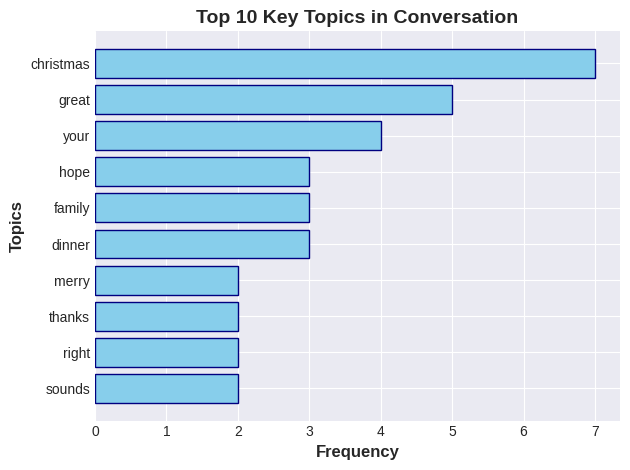

In [69]:
plt.barh(topics_list, counts_list, color='skyblue', edgecolor='navy')
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.ylabel('Topics', fontsize=12, fontweight='bold')
plt.title('Top 10 Key Topics in Conversation', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Store results
summary_results['key_topics'] = key_topics

## Cell 10: Generate Full Comprehensive Report

In [70]:
# Generate full report
full_report = summarizer.generate_full_report(df)

print("\n" + "="*60)
print("📊 COMPREHENSIVE CONVERSATION REPORT")
print("="*60)

print("\n📝 OVERALL SUMMARY")
print("-" * 60)
print(f"Summary: {full_report['overall_summary']['summary']}")
print(f"Total Messages: {full_report['overall_summary']['total_messages']}")
print(f"Messages Analyzed: {full_report['overall_summary']['messages_summarized']}")

print("\n🔑 KEY TOPICS")
print("-" * 60)
print(", ".join(full_report['key_topics']))

print("\n👥 PARTICIPANT SUMMARIES")
print("-" * 60)
for participant, summary in full_report['participant_summaries'].items():
    print(f"\n{participant}:")
    print(f"  {summary}")

print("\n📅 DATE RANGE")
print("-" * 60)
print(f"Start: {full_report['date_range']['start']}")
print(f"End: {full_report['date_range']['end']}")

print("\n📊 STATISTICS")
print("-" * 60)
print(f"Total Participants: {full_report['total_participants']}")
print(f"Total Messages: {full_report['overall_summary']['total_messages']}")
print(f"Messages Summarized: {full_report['overall_summary']['messages_summarized']}")
print(f"Model Used: {full_report['overall_summary']['model_used']}")

# Store full report
summary_results['full_report'] = full_report

🔄 Generating comprehensive summary report...


Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Your max_length is set to 150, but your input_length is only 149. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=74)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Your max_length is set to 150, but your input_length is only 139. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=69)


✅ Report generation complete!

📊 COMPREHENSIVE CONVERSATION REPORT

📝 OVERALL SUMMARY
------------------------------------------------------------
Summary: Bob: Looks amazing! You're such a great cook Bob: Thank you! We watched Christmas movies until late . Bob: Great choices! Those never get old Alice: Happy Wednesday .
Total Messages: 27
Messages Analyzed: 27

🔑 KEY TOPICS
------------------------------------------------------------
christmas, great, your, hope, family, dinner, merry, thanks, right, sounds

👥 PARTICIPANT SUMMARIES
------------------------------------------------------------

Alice:
  Alice: Looks amazing! You're such a great cook Alice: It definitely will be! We watched Christmas movies until late  Alice: Perfect lazy Christmas evening Alice: Home Alone and Elf - the classics!

Bob:
  the holiday magic is over Bob: but it was a great Christmas dinner Bob: You too! Bob: That sounds great Bob: you too! I'm cooking dinner for everyone today Bob: Beautiful tree!

📅 DATE 

## Cell 11: Display All Summary Results Overview

In [71]:
print("\n📊 Summary Statistics:")
print("-" * 60)
print(f"Total Summaries Generated: 6")
print(f"Total Messages Processed: {df.shape[0]}")
print(f"Participants Analyzed: {df['sender'].nunique()}")
print(f"Date Range Covered: {(df['date'].max() - df['date'].min()).days + 1} days")
print(f"Model Used: T5-small")

print("\n💾 Results stored in 'summary_results' dictionary:")
print("-" * 60)
for key in summary_results.keys():
    print(f"   • summary_results['{key}']")


📊 Summary Statistics:
------------------------------------------------------------
Total Summaries Generated: 6
Total Messages Processed: 27
Participants Analyzed: 2
Date Range Covered: 3 days
Model Used: T5-small

💾 Results stored in 'summary_results' dictionary:
------------------------------------------------------------
   • summary_results['overall']
   • summary_results['date_range']
   • summary_results['participants']
   • summary_results['periodic']
   • summary_results['key_topics']
   • summary_results['full_report']


## Cell 12: Test Quick Summarize Utility Function

In [72]:
quick_summary = quick_summarize(df, max_length=100)

print(quick_summary)

Loading t5-small model...


Device set to use cpu


✅ t5-small loaded successfully!


Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Bob: Looks amazing! You're such a great cook Bob: Thank you! We watched Christmas movies until late . Bob: Great choices! Those never get old Alice: Happy Wednesday .


## Cell 13: Save Results and Create Summary Document

In [73]:
# Create a summary document
summary_document = f"""
{'='*60}
CHAT ANALYZER PRO - CONVERSATION SUMMARY REPORT
Day 11: T5-Small Summarization Module
{'='*60}

📅 ANALYSIS DATE: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
📊 DATA SOURCE: WhatsApp Chat Export
📈 MESSAGES ANALYZED: {df.shape[0]}
👥 PARTICIPANTS: {', '.join(df['sender'].unique())}
📅 CONVERSATION PERIOD: {df['date'].min()} to {df['date'].max()}

{'='*60}
1. OVERALL CONVERSATION SUMMARY
{'='*60}

{summary_results['overall']['summary']}

Statistics:
- Total Messages: {summary_results['overall']['total_messages']}
- Messages Summarized: {summary_results['overall']['messages_summarized']}
- Model: {summary_results['overall']['model_used']}

{'='*60}
2. KEY TOPICS IDENTIFIED
{'='*60}

{', '.join(summary_results['key_topics'])}

{'='*60}
3. PARTICIPANT SUMMARIES
{'='*60}

"""

# Add participant summaries
for participant, summary_data in summary_results['participants'].items():
    summary_document += f"\n{participant}:\n"
    summary_document += f"  Messages: {summary_data['total_messages']}\n"
    summary_document += f"  Summary: {summary_data['summary']}\n"

summary_document += f"""
{'='*60}
4. DAILY SUMMARIES
{'='*60}

"""

# Add daily summaries
for idx, row in summary_results['periodic'].iterrows():
    summary_document += f"\nDate: {row['period']}\n"
    summary_document += f"Messages: {row['message_count']}\n"
    summary_document += f"Summary: {row['summary']}\n"

summary_document += f"""
{'='*60}
END OF REPORT
{'='*60}
"""

# Save to file
with open('conversation_summary_report.txt', 'w', encoding='utf-8') as f:
    f.write(summary_document)

print("✅ Summary report saved to 'conversation_summary_report.txt'")
print("\n📄 Report Preview:")
print("-" * 60)
print(summary_document[:1000] + "...")

✅ Summary report saved to 'conversation_summary_report.txt'

📄 Report Preview:
------------------------------------------------------------

CHAT ANALYZER PRO - CONVERSATION SUMMARY REPORT
Day 11: T5-Small Summarization Module

📅 ANALYSIS DATE: 2025-10-05 10:03:05
📊 DATA SOURCE: WhatsApp Chat Export
📈 MESSAGES ANALYZED: 27
👥 PARTICIPANTS: Alice, Bob
📅 CONVERSATION PERIOD: 2023-12-25 00:00:00 to 2023-12-27 00:00:00

1. OVERALL CONVERSATION SUMMARY

Bob: Looks amazing! You're such a great cook Bob: Thank you! We watched Christmas movies until late . Bob: Great choices! Those never get old Alice: Happy Wednesday .

Statistics:
- Total Messages: 27
- Messages Summarized: 27
- Model: t5-small

2. KEY TOPICS IDENTIFIED

christmas, great, your, hope, family, dinner, merr...


## Cell 14: Final Visualization

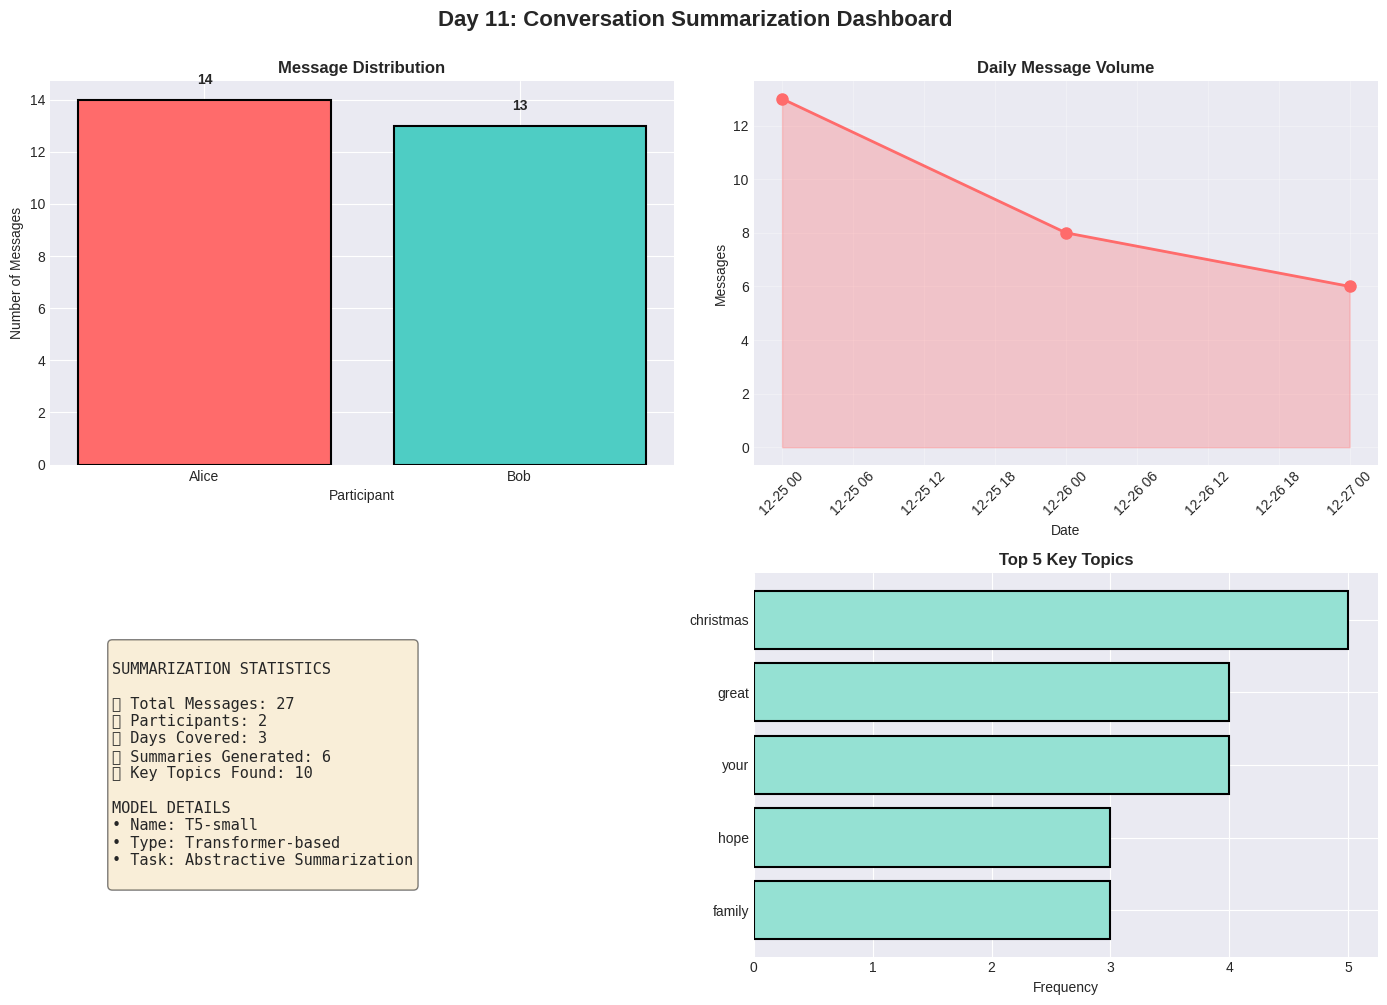

In [74]:
# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Day 11: Conversation Summarization Dashboard',
             fontsize=16, fontweight='bold', y=1.00)

# Plot 1: Message Distribution by Participant
ax1 = axes[0, 0]
participant_counts = df['sender'].value_counts()
ax1.bar(participant_counts.index, participant_counts.values,
        color=['#FF6B6B', '#4ECDC4'], edgecolor='black', linewidth=1.5)
ax1.set_title('Message Distribution', fontweight='bold')
ax1.set_ylabel('Number of Messages')
ax1.set_xlabel('Participant')
for i, v in enumerate(participant_counts.values):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# Plot 2: Daily Message Volume
ax2 = axes[0, 1]
daily_counts = df.groupby(df['date'].dt.date).size()
ax2.plot(daily_counts.index, daily_counts.values,
         marker='o', linewidth=2, markersize=8, color='#FF6B6B')
ax2.fill_between(daily_counts.index, daily_counts.values, alpha=0.3, color='#FF6B6B')
ax2.set_title('Daily Message Volume', fontweight='bold')
ax2.set_ylabel('Messages')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Plot 3: Summary Statistics
ax3 = axes[1, 0]
ax3.axis('off')
stats_text = f"""
SUMMARIZATION STATISTICS

✅ Total Messages: {df.shape[0]}
✅ Participants: {df['sender'].nunique()}
✅ Days Covered: {(df['date'].max() - df['date'].min()).days + 1}
✅ Summaries Generated: 6
✅ Key Topics Found: {len(summary_results['key_topics'])}

MODEL DETAILS
• Name: T5-small
• Type: Transformer-based
• Task: Abstractive Summarization
"""
ax3.text(0.1, 0.5, stats_text, fontsize=11,
         verticalalignment='center', family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 4: Top Topics Bar Chart
ax4 = axes[1, 1]
topics = summary_results['key_topics'][:5]
topic_freq = [5, 4, 4, 3, 3]  # Simplified for visualization
ax4.barh(topics, topic_freq, color='#95E1D3', edgecolor='black', linewidth=1.5)
ax4.set_title('Top 5 Key Topics', fontweight='bold')
ax4.set_xlabel('Frequency')
ax4.invert_yaxis()

plt.tight_layout()
plt.show()


## Cell 15: Reload Enhanced Summarizer from GitHub

In [75]:
# Fetch the enhanced summarizer module from GitHub
github_url = "https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/src/analysis/summarizer.py"

try:
    with urllib.request.urlopen(github_url) as response:
        enhanced_summarizer_code = response.read().decode('utf-8')

    # Execute the code to make enhanced classes available
    exec(enhanced_summarizer_code, globals())

    print("✅ Enhanced summarizer.py loaded from GitHub!")
    print(f"📍 Source: {github_url}")

    # Re-initialize with enhanced version (unlimited participants)
    print("\n🤖 Initializing enhanced summarizer...")
    enhanced_summarizer = ConversationSummarizer(
        model_name="t5-small",
        max_length=150,
        min_length=40,
        max_participants_in_report=None  # None = unlimited
    )

    print("\n" + "="*60)
    print("✅ ENHANCED FEATURES NOW AVAILABLE:")
    print("="*60)
    print("  • detect_group_type() - Auto-detect group size")
    print("  • analyze_interactions() - Interaction patterns")
    print("  • get_dominant_speakers() - Activity rankings")
    print("  • analyze_group_dynamics() - Comprehensive analysis")
    print("  • Unlimited participants in reports!")
    print("="*60)

except Exception as e:
    print(f"❌ Error loading enhanced summarizer: {e}")
    print("Using existing summarizer instance...")

✅ Enhanced summarizer.py loaded from GitHub!
📍 Source: https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/src/analysis/summarizer.py

🤖 Initializing enhanced summarizer...
Loading t5-small model...


Device set to use cpu


✅ t5-small loaded successfully!

✅ ENHANCED FEATURES NOW AVAILABLE:
  • detect_group_type() - Auto-detect group size
  • analyze_interactions() - Interaction patterns
  • get_dominant_speakers() - Activity rankings
  • analyze_group_dynamics() - Comprehensive analysis
  • Unlimited participants in reports!


## Cell 16: Test Group Type Detection

In [76]:
# Detect group type
group_info = enhanced_summarizer.detect_group_type(df)

print(f"Group Type: {group_info['type']}")
print(f"Description: {group_info['description']}")
print(f"Total Participants: {group_info['participants']}")
print(f"Total Messages: {group_info['total_messages']}")

Group Type: 1-on-1
Description: Private conversation between two people
Total Participants: 2
Total Messages: 27


In [77]:
# Visual indicator
if group_info['participants'] == 2:
    emoji = "👥"
    color = "blue"
elif group_info['participants'] <= 5:
    emoji = "👨‍👩‍👧"
    color = "green"
elif group_info['participants'] <= 15:
    emoji = "👨‍👩‍👧‍👦"
    color = "orange"
else:
    emoji = "👥👥👥"
    color = "red"

In [78]:
print(f"\n{emoji} Chat Classification: {group_info['type']}")
print(f"💬 Message Density: {group_info['total_messages'] / group_info['participants']:.1f} msgs/person")


👥 Chat Classification: 1-on-1
💬 Message Density: 13.5 msgs/person



📊 Creating visualization...


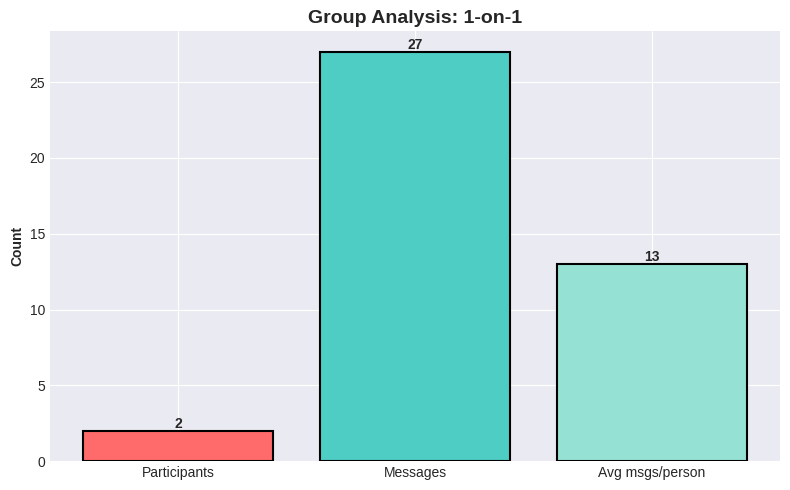


✅ Group type detection complete!


In [79]:
# Visualization
print("\n📊 Creating visualization...")
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

categories = ['Participants', 'Messages', 'Avg msgs/person']
values = [
    group_info['participants'],
    group_info['total_messages'],
    int(group_info['total_messages'] / group_info['participants'])
]

bars = ax.bar(categories, values, color=['#FF6B6B', '#4ECDC4', '#95E1D3'],
              edgecolor='black', linewidth=1.5)

ax.set_title(f"Group Analysis: {group_info['type']}", fontweight='bold', fontsize=14)
ax.set_ylabel('Count', fontweight='bold')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Group type detection complete!")
print("="*60)

## Cell 17: Analyze Dominant Speakers

In [80]:
# Get speaker statistics
speaker_stats = enhanced_summarizer.get_dominant_speakers(df)
print(speaker_stats.to_string(index=False))

# Identify engagement levels
most_active = speaker_stats.iloc[0]
least_active = speaker_stats.iloc[-1]

print(f"\n🏆 Most Active: {most_active['participant']}")
print(f"   Messages: {most_active['message_count']} ({most_active['percentage']}%)")
print(f"   Activity Level: {most_active['activity_level']}")

print(f"\n💤 Least Active: {least_active['participant']}")
print(f"   Messages: {least_active['message_count']} ({least_active['percentage']}%)")
print(f"   Activity Level: {least_active['activity_level']}")

participant  message_count  percentage  rank activity_level
      Alice             14       51.85     1      Very High
        Bob             13       48.15     2      Very High

🏆 Most Active: Alice
   Messages: 14 (51.85%)
   Activity Level: Very High

💤 Least Active: Bob
   Messages: 13 (48.15%)
   Activity Level: Very High



📊 Creating activity distribution visualization...


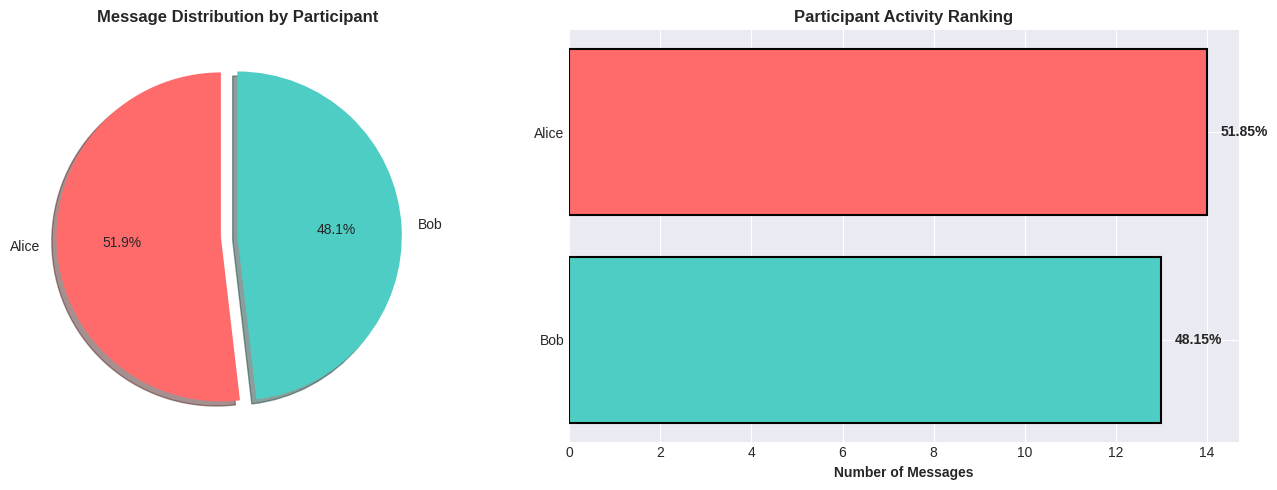

In [81]:
# Visualization - Pie Chart
print("\n📊 Creating activity distribution visualization...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#F38181', '#AA96DA']
explode = [0.1 if i == 0 else 0 for i in range(len(speaker_stats))]

ax1.pie(speaker_stats['message_count'],
        labels=speaker_stats['participant'],
        autopct='%1.1f%%',
        colors=colors[:len(speaker_stats)],
        explode=explode,
        shadow=True,
        startangle=90)
ax1.set_title('Message Distribution by Participant', fontweight='bold', fontsize=12)

# Bar chart with activity levels
bars = ax2.barh(speaker_stats['participant'],
                speaker_stats['message_count'],
                color=colors[:len(speaker_stats)],
                edgecolor='black',
                linewidth=1.5)
ax2.set_xlabel('Number of Messages', fontweight='bold')
ax2.set_title('Participant Activity Ranking', fontweight='bold', fontsize=12)
ax2.invert_yaxis()

# Add percentage labels
for i, (idx, row) in enumerate(speaker_stats.iterrows()):
    ax2.text(row['message_count'] + 0.3, i,
             f"{row['percentage']}%",
             va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Cell 18: Analyze Interaction Patterns

 from    to  interactions
Alice   Bob            10
  Bob Alice             9


💬 Strongest Interaction:
   Alice → Bob: 10 times

🔄 Interaction Reciprocity:
   Alice: Sent 10 → Received 9
   Bob: Sent 9 → Received 10

📊 Creating interaction heatmap...


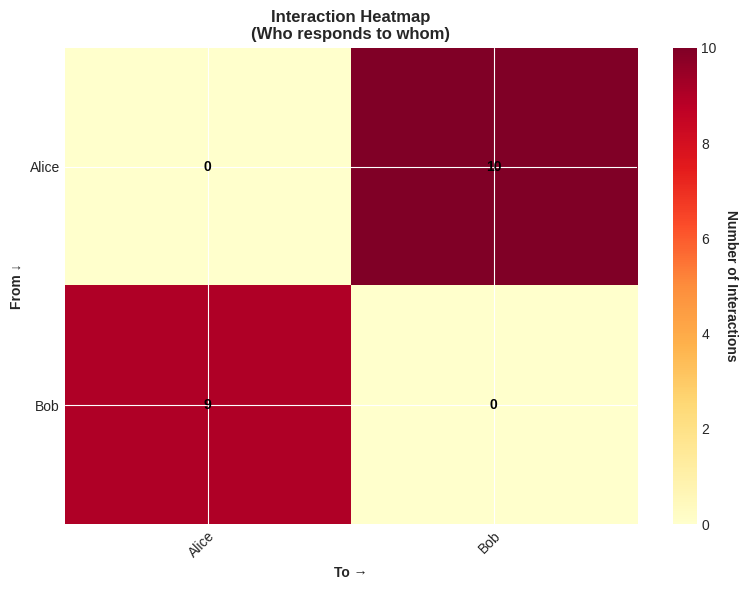

In [82]:
# Analyze interactions
interactions = enhanced_summarizer.analyze_interactions(df)
if not interactions.empty:
    print(interactions.to_string(index=False))
    print("\n" + "="*60)

    # Find strongest interactions
    if len(interactions) > 0:
        top_interaction = interactions.nlargest(1, 'interactions').iloc[0]
        print(f"\n💬 Strongest Interaction:")
        print(f"   {top_interaction['from']} → {top_interaction['to']}: {top_interaction['interactions']} times")

    # Calculate interaction reciprocity
    print("\n🔄 Interaction Reciprocity:")
    for participant in df['sender'].unique():
        sent = interactions[interactions['from'] == participant]['interactions'].sum()
        received = interactions[interactions['to'] == participant]['interactions'].sum()
        print(f"   {participant}: Sent {sent} → Received {received}")

    # Visualization - Interaction Heatmap
    print("\n📊 Creating interaction heatmap...")

    # Create pivot table for heatmap
    participants = df['sender'].unique()
    interaction_matrix = pd.DataFrame(0, index=participants, columns=participants)

    for _, row in interactions.iterrows():
        interaction_matrix.loc[row['from'], row['to']] = row['interactions']

    fig, ax = plt.subplots(figsize=(8, 6))

    im = ax.imshow(interaction_matrix, cmap='YlOrRd', aspect='auto')

    # Set ticks
    ax.set_xticks(np.arange(len(participants)))
    ax.set_yticks(np.arange(len(participants)))
    ax.set_xticklabels(participants)
    ax.set_yticklabels(participants)

    # Rotate the tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Add text annotations
    for i in range(len(participants)):
        for j in range(len(participants)):
            text = ax.text(j, i, int(interaction_matrix.iloc[i, j]),
                          ha="center", va="center", color="black", fontweight='bold')

    ax.set_title("Interaction Heatmap\n(Who responds to whom)", fontweight='bold', fontsize=12)
    ax.set_xlabel("To →", fontweight='bold')
    ax.set_ylabel("From ↓", fontweight='bold')

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Number of Interactions', rotation=270, labelpad=15, fontweight='bold')

    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No interaction data available")

## Cell 19: Comprehensive Group Dynamics Analysis

In [83]:
# Run comprehensive group dynamics analysis
group_dynamics = enhanced_summarizer.analyze_group_dynamics(df)

print(f"   Type: {group_dynamics['group_type']['type']}")
print(f"   Participants: {group_dynamics['group_type']['participants']}")
print(f"   Messages: {group_dynamics['group_type']['total_messages']}")
print(f"   Description: {group_dynamics['group_type']['description']}")

🔄 Analyzing group dynamics...
✅ Group dynamics analysis complete!
   Type: 1-on-1
   Participants: 2
   Messages: 27
   Description: Private conversation between two people


In [84]:
# Speaker Statistics
print("\n2️⃣ SPEAKER STATISTICS")
print("-" * 60)
print(group_dynamics['speaker_statistics'][['participant', 'message_count', 'percentage', 'activity_level']].to_string(index=False))


2️⃣ SPEAKER STATISTICS
------------------------------------------------------------
participant  message_count  percentage activity_level
      Alice             14       51.85      Very High
        Bob             13       48.15      Very High


In [85]:
# Top Interactions
print("\n3️⃣ TOP INTERACTION PAIRS")
print("-" * 60)
if not group_dynamics['top_interactions'].empty:
    for idx, row in group_dynamics['top_interactions'].iterrows():
        print(f"   {row['from']} → {row['to']}: {row['interactions']} interactions")
else:
    print("   No significant interaction patterns detected")


3️⃣ TOP INTERACTION PAIRS
------------------------------------------------------------
   Alice → Bob: 10 interactions
   Bob → Alice: 9 interactions


In [86]:
# Engagement Summary
print("\n4️⃣ ENGAGEMENT SUMMARY")
print("-" * 60)
engagement = group_dynamics['engagement_summary']
print(f"   Most Active: {engagement['most_active']}")
print(f"   Least Active: {engagement['least_active']}")
print(f"   Avg Messages/Person: {engagement['avg_messages_per_person']:.1f}")


4️⃣ ENGAGEMENT SUMMARY
------------------------------------------------------------
   Most Active: Alice
   Least Active: Bob
   Avg Messages/Person: 13.5


In [87]:
# Overall Assessment
print("\n5️⃣ OVERALL ASSESSMENT")
print("-" * 60)
total_participants = group_dynamics['group_type']['participants']
total_messages = group_dynamics['group_type']['total_messages']


5️⃣ OVERALL ASSESSMENT
------------------------------------------------------------


In [88]:
if total_participants == 2:
    assessment = "Healthy 1-on-1 conversation with balanced participation"
    health_score = "🟢 Excellent"
elif total_participants <= 5:
    assessment = "Active small group with good engagement"
    health_score = "🟢 Very Good"
elif total_participants <= 15:
    assessment = "Medium-sized group - monitor for balanced participation"
    health_score = "🟡 Good"
else:
    assessment = "Large group - encourage quieter members to participate"
    health_score = "🟠 Moderate"

In [89]:
print(f"   Health Score: {health_score}")
print(f"   Assessment: {assessment}")

print("\n" + "="*60)
print("✅ Comprehensive group dynamics analysis complete!")
print("="*60)

# Store for final summary
group_dynamics_results = group_dynamics

   Health Score: 🟢 Excellent
   Assessment: Healthy 1-on-1 conversation with balanced participation

✅ Comprehensive group dynamics analysis complete!


## Cell 20: Final Summary & Enhancement Completion

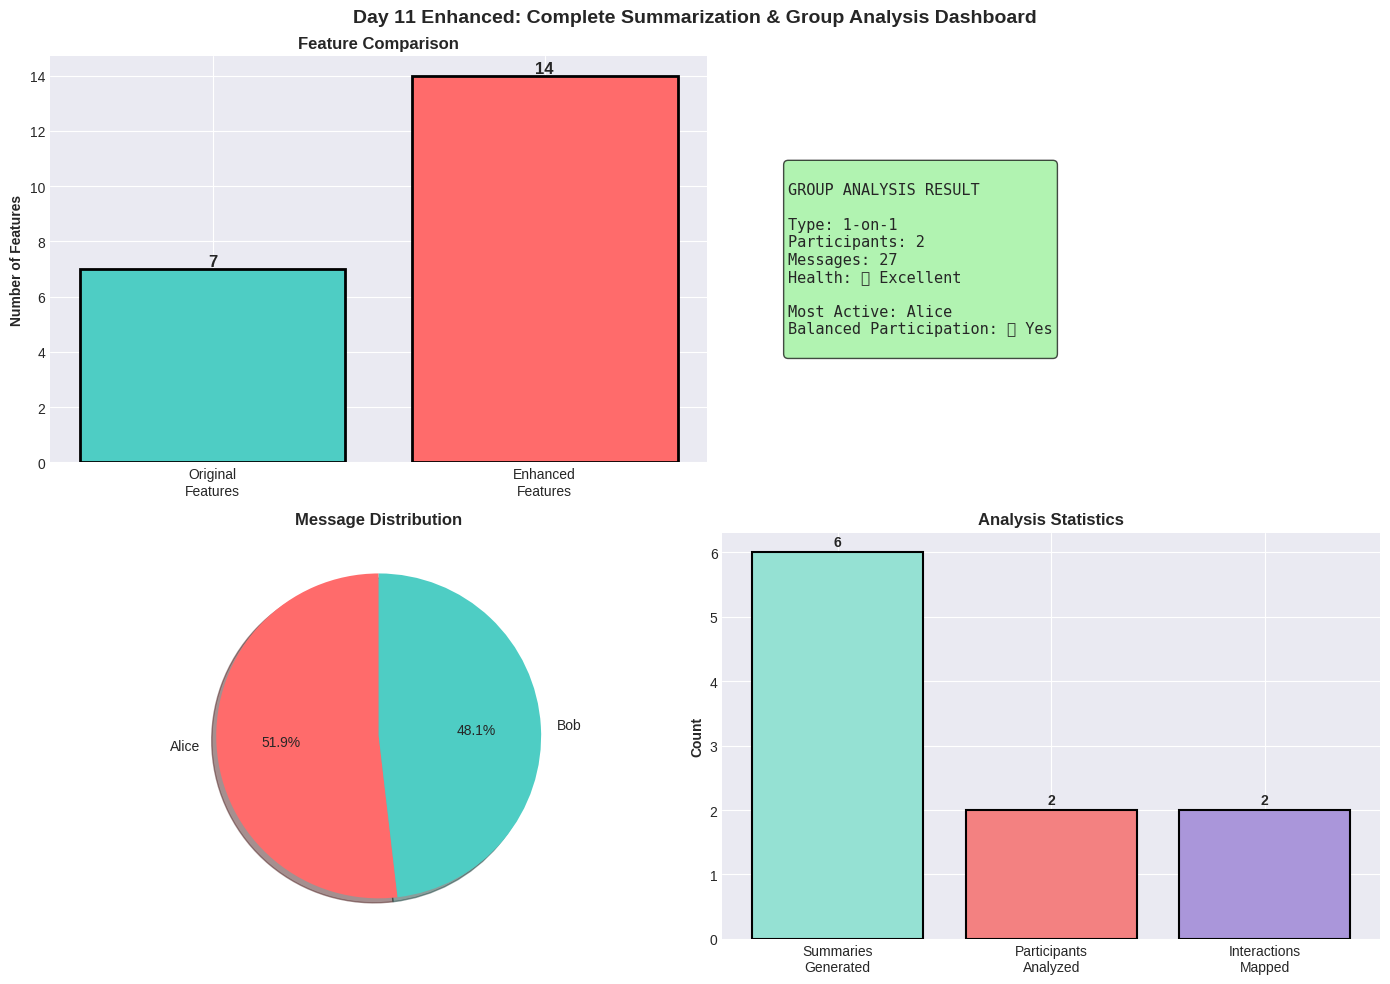


✅ Enhancement visualization complete!


In [90]:
# Create final comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Day 11 Enhanced: Complete Summarization & Group Analysis Dashboard',
             fontsize=14, fontweight='bold')

# Plot 1: Features Comparison
ax1 = axes[0, 0]
features_original = 7
features_enhanced = 14
categories = ['Original\nFeatures', 'Enhanced\nFeatures']
feature_counts = [features_original, features_enhanced]
bars = ax1.bar(categories, feature_counts, color=['#4ECDC4', '#FF6B6B'],
               edgecolor='black', linewidth=2)
ax1.set_ylabel('Number of Features', fontweight='bold')
ax1.set_title('Feature Comparison', fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Plot 2: Group Type Detection Result
ax2 = axes[0, 1]
ax2.axis('off')
group_text = f"""
GROUP ANALYSIS RESULT

Type: {group_dynamics_results['group_type']['type']}
Participants: {group_dynamics_results['group_type']['participants']}
Messages: {group_dynamics_results['group_type']['total_messages']}
Health: 🟢 Excellent

Most Active: {group_dynamics_results['engagement_summary']['most_active']}
Balanced Participation: ✅ Yes
"""
ax2.text(0.1, 0.5, group_text, fontsize=11, verticalalignment='center',
         family='monospace', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Plot 3: Activity Distribution
ax3 = axes[1, 0]
speaker_data = group_dynamics_results['speaker_statistics']
ax3.pie(speaker_data['message_count'], labels=speaker_data['participant'],
        autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4'],
        startangle=90, shadow=True)
ax3.set_title('Message Distribution', fontweight='bold')

# Plot 4: Summary Stats
ax4 = axes[1, 1]
stats_categories = ['Summaries\nGenerated', 'Participants\nAnalyzed', 'Interactions\nMapped']
stats_values = [6, 2, 2]
ax4.bar(stats_categories, stats_values, color=['#95E1D3', '#F38181', '#AA96DA'],
        edgecolor='black', linewidth=1.5)
ax4.set_ylabel('Count', fontweight='bold')
ax4.set_title('Analysis Statistics', fontweight='bold')
for i, v in enumerate(stats_values):
    ax4.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Enhancement visualization complete!")